# Importing the dependencies

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imutils 
import easyocr
# from illumination import *

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# img_path = r"dataset-card.jpg"           
img_path = r"image5.jpg"           

# Read the image

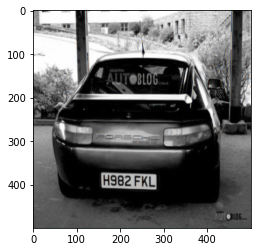

In [3]:
img = cv2.imread(img_path)       
img = cv2.resize(img, (500, 500))   
# print(img) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BAYER_BG2BGR))

# Illumination

In [4]:
img = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
img = cv2.edgePreservingFilter(img, flags=1, sigma_s=64, sigma_r=0.2)

# Edges detection

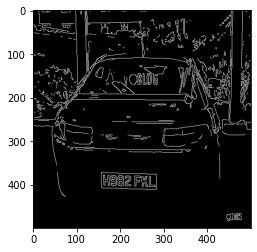

In [5]:
Filter = cv2.bilateralFilter(gray, 11, 17, 17)      # noise reduction
edged = cv2.Canny(Filter, 200, 250)    # Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Find contours and apply mask.

In [6]:
keys = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keys) 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] 

In [7]:
location = None 
for contour in contours: 
    approx = cv2.approxPolyDP(contour, 10, True) 
    if len(approx) == 4:  
        location = approx 
        break

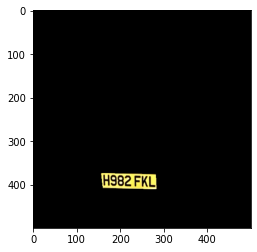

In [8]:
mask = np.zeros(gray.shape, np.uint8) 
new_img = cv2.drawContours(mask, [location], 0, 255, -1) 
new_img = cv2.bitwise_and(img, img, mask=mask) #use to findout the segment of number plate.
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))  #here we get co-ordinate on number plate is.

# Extract the number plate of the car.

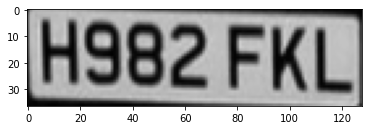

In [9]:
(x,y) = np.where(mask==255) 
(x1, y1) = (np.min(x), np.min(y)) 
(x2, y2) = (np.max(x), np.max(y)) 

cropped_img = gray[x1:x2+1, y1:y2+1]  
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

# Reading text from the extracted number plate

In [10]:
reader = easyocr.Reader(['en']) 
result = reader.readtext(cropped_img) 
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Drawing rectangle and putting text extracted in original image

In [ ]:
text = ""
for i in result:
    text += i[-2] + " "   # we are taking the 2nd element from the last of the 2d array.
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

: 